#Preprocessing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller #for stationary AUF test

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Handlig data path
DATA_PATH = "/content/drive/MyDrive/studia/Inżynierka/MAIN/" # direct path to the folder with data

In [4]:
import sys
sys.path.append('/content/drive/MyDrive/studia/Inżynierka/MAIN/')
import yfiDownloader as yf
from yfiDownloader import download_ticker, download_sp500
import pandasDataSet as pds

In [5]:
#Loading the dataset with hourly stock prices for values in USD.
selected_tickers = ['AAPL']
yf.download_sp500(selected_tickers, interval='1h', split=True)

[*********************100%***********************]  1 of 1 completed


Downloaded 3484 rows for AAPL
Saved new data for AAPL.


/content/drive/MyDrive/studia/Inżynierka/MAIN/yfiDownloader.py:56: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  combined_data = pd.read_csv(file_path, index_col=0, parse_dates=True, infer_datetime_format=True)
/content/drive/MyDrive/studia/Inżynierka/MAIN/yfiDownloader.py:56: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_data = pd.read_csv(file_path, index_col=0, parse_dates=True, infer_datetime_format=True)


## Preparing the dataset

In [6]:
dataset = pd.read_csv('/content/data/sp500/AAPL_1h.csv', low_memory = False, parse_dates=True)
dataset = dataset.drop(index=0)
dataset = dataset.drop(index=1)
dataset.reset_index(drop=True,inplace=True)
dataset = dataset[['Price','Close']]
dataset.rename(columns = {'Price':'Datetime'}, inplace = True)
dataset['Datetime'] = pd.to_datetime(dataset['Datetime']).dt.tz_localize(None)
dataset.head()

,Datetime,Close
0,2022-10-31 13:30:00,152.47000122070312
1,2022-10-31 14:30:00,153.3000030517578
2,2022-10-31 15:30:00,153.97999572753906
3,2022-10-31 16:30:00,153.9499969482422
4,2022-10-31 17:30:00,153.77000427246094


In [7]:
dataset.info()
dataset['Close'] = pd.to_numeric(dataset['Close'], errors='coerce')
print('\n Types of dataset: \n',dataset.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3484 entries, 0 to 3483
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  3484 non-null   datetime64[ns]
 1   Close     3484 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 54.6+ KB

 Types of dataset: 
 Datetime    datetime64[ns]
Close              float64
dtype: object


Our dataset contains 2 variables (columns). Each one of them represents:

1. Datetime: datetime of the observation.
2. Close: value at the close price of the transaction datetime.

All values are in USD.

## Cleaning the data

In [8]:
#Checking for missing values
missing_values = dataset.isnull().sum()

#Checking the presence of missing values
print("\nPresence of missing values:")
print(dataset.isnull().any())


Presence of missing values:
Datetime    False
Close       False
dtype: bool


## Close Price change over time


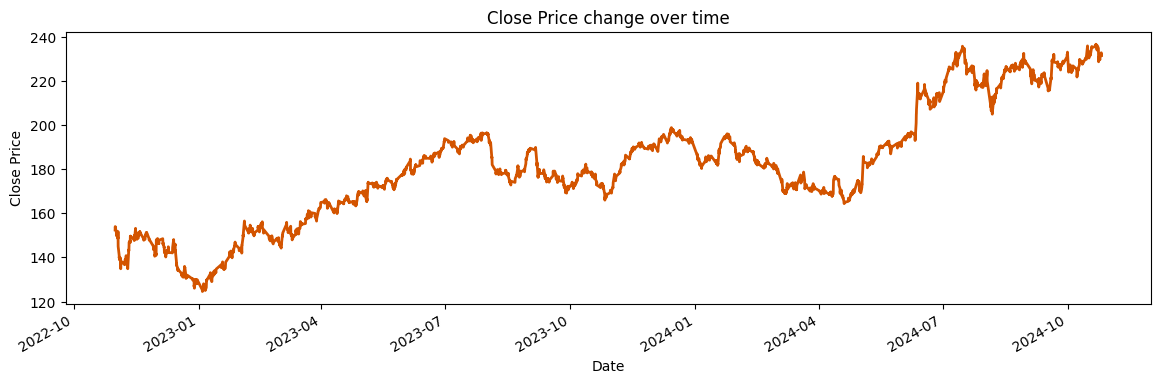

In [9]:
#Chart of Adobe Price change over time
dataset.set_index('Datetime')['Close'].plot(linewidth=2, figsize=(14, 4), color='#d35400')
plt.title('Close Price change over time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

## Defining The Daily Percentage Change

In [10]:
# Caclulate the Daily Percentage Change in stock price - returns
dataset.loc[:,'Returns'] = (dataset['Close'].pct_change() * 100).round(2)
dataset = dataset.dropna(subset=['Returns'])
dataset

,Datetime,Close,Returns
1,2022-10-31 14:30:00,153.300003,0.54
2,2022-10-31 15:30:00,153.979996,0.44
3,2022-10-31 16:30:00,153.949997,-0.02
4,2022-10-31 17:30:00,153.770004,-0.12
5,2022-10-31 18:30:00,153.339996,-0.28
...,...,...,...
3479,2024-10-25 15:30:00,232.710007,0.21
3480,2024-10-25 16:30:00,231.857498,-0.37
3481,2024-10-25 17:30:00,231.839996,-0.01
3482,2024-10-25 18:30:00,231.619995,-0.09


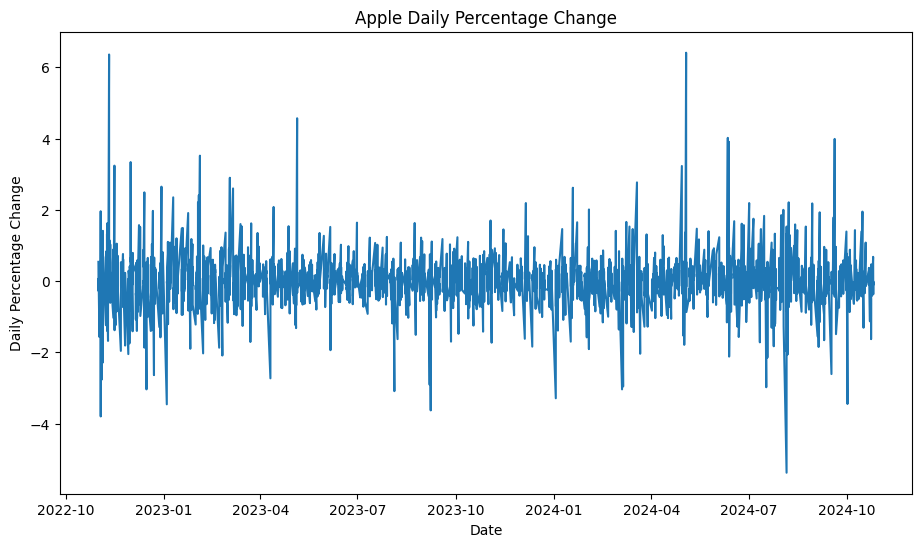

In [11]:
# Plot Daily Percentage Change
plt.figure(figsize=(11,6))
plt.plot(dataset['Datetime'], dataset['Returns'])
plt.title("Apple Daily Percentage Change")
plt.xlabel("Date")
plt.ylabel("Daily Percentage Change")
plt.show()

## Filtering the selected period of time

In [12]:
last_date = dataset['Datetime'].max()
last_months_ago = last_date - pd.DateOffset(months=12)
filtered_dataset = dataset[(dataset['Datetime'] >= last_months_ago) & (dataset['Datetime'] <= last_date)]
filtered_dataset = filtered_dataset.reset_index(drop=True)
filtered_dataset

,Datetime,Close,Returns
0,2023-10-25 19:30:00,171.089996,-0.05
1,2023-10-26 13:30:00,168.660004,-1.42
2,2023-10-26 14:30:00,166.949600,-1.01
3,2023-10-26 15:30:00,166.297394,-0.39
4,2023-10-26 16:30:00,165.949997,-0.21
...,...,...,...
1752,2024-10-25 15:30:00,232.710007,0.21
1753,2024-10-25 16:30:00,231.857498,-0.37
1754,2024-10-25 17:30:00,231.839996,-0.01
1755,2024-10-25 18:30:00,231.619995,-0.09


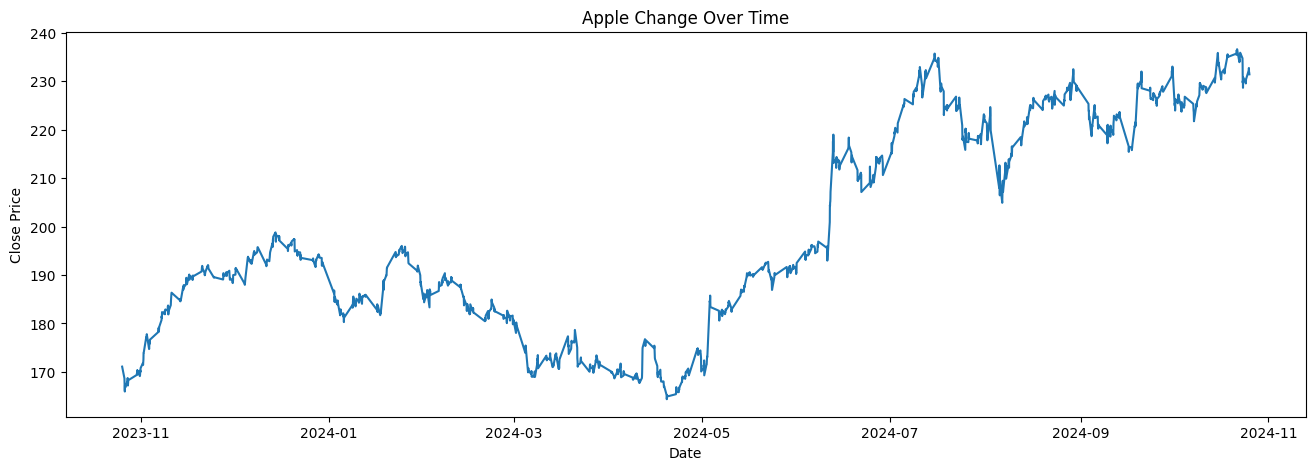

In [13]:
# Plot the filtered dataset
plt.figure(figsize=(16,5))
plt.plot(filtered_dataset['Datetime'],filtered_dataset['Close'])
plt.title("Apple Change Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [15]:
filtered_dataset

,Datetime,Close,Returns
0,2023-10-25 19:30:00,171.089996,-0.05
1,2023-10-26 13:30:00,168.660004,-1.42
2,2023-10-26 14:30:00,166.949600,-1.01
3,2023-10-26 15:30:00,166.297394,-0.39
4,2023-10-26 16:30:00,165.949997,-0.21
...,...,...,...
1752,2024-10-25 15:30:00,232.710007,0.21
1753,2024-10-25 16:30:00,231.857498,-0.37
1754,2024-10-25 17:30:00,231.839996,-0.01
1755,2024-10-25 18:30:00,231.619995,-0.09


## Saving the dataframe

In [17]:
dataset.to_csv(DATA_PATH + 'PreparedDataset.csv', index=False)